In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ROOT_PATH = "/content/drive/Shareddrives/DLAV"

In [3]:
import json 
import os
import sys
import numpy as np

%load_ext autoreload
%autoreload 2
sys.path.append(ROOT_PATH)
sys.path.append(os.path.join(ROOT_PATH,"utils"))

file = os.path.join(ROOT_PATH,"dlav_data","annotations","apollo_keypoints_24_train.json")
if os.path.exists(file):
  with open(file, "r") as f:
    annot_dict = json.load(f)
else:
  raise ValueError("The given config file doesn't exist")

In [28]:
import visualizations as viz
from openpifpaf_helper import *

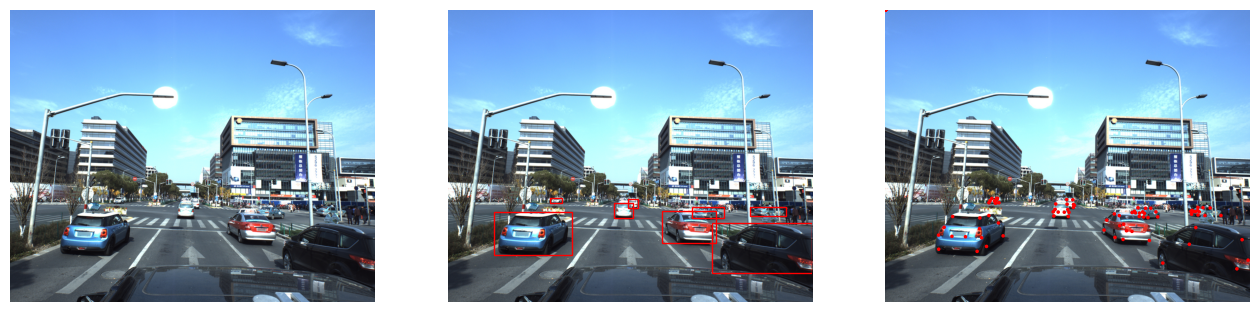

In [ ]:

viz.plot_keypoints_and_bounding_box(34630104,annot_dict,ROOT_PATH)

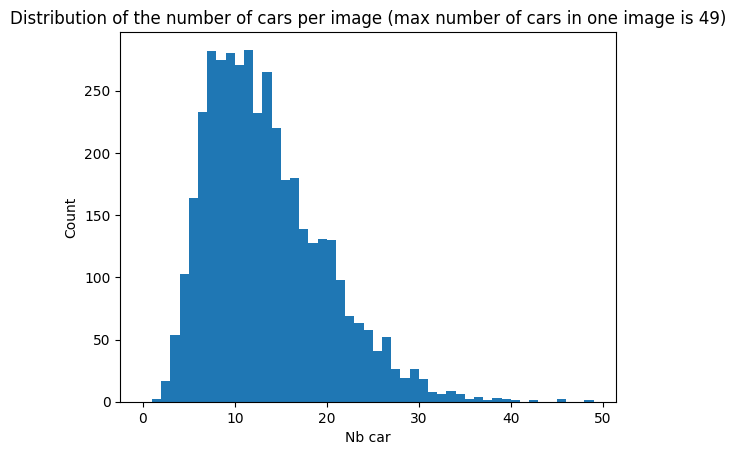

In [ ]:
from eda import *
car_distrib = get_nb_car_distribution(annot_dict)
max_nb = max(car_distrib)
viz.plot_distribution(car_distrib,f"Distribution of the number of cars per image (max number of cars in one image is {max_nb})","Nb car")


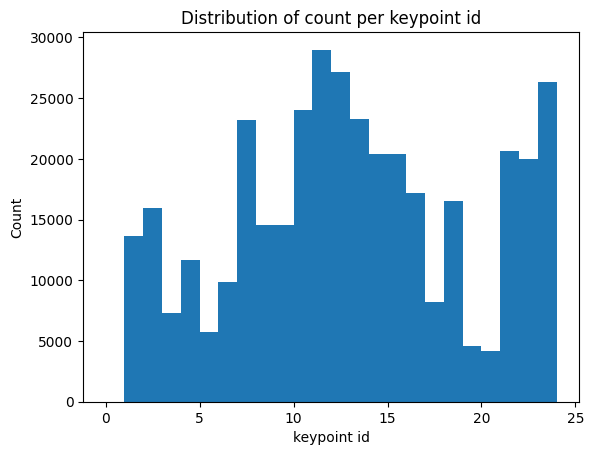

In [ ]:

viz.plot_distribution(get_keypoint_class_distrib(annot_dict),"Distribution of count per keypoint id","keypoint id",bins=np.arange(25))


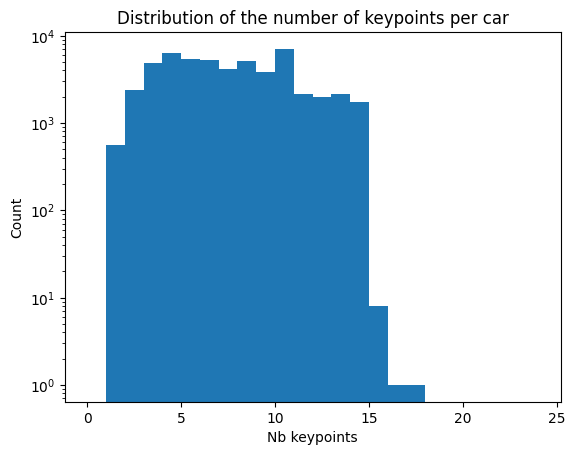

In [ ]:
viz.plot_distribution(get_nb_keypoints_car_distribution(annot_dict),"Distribution of the number of keypoints per car","Nb keypoints",logy=True,bins=np.arange(25))


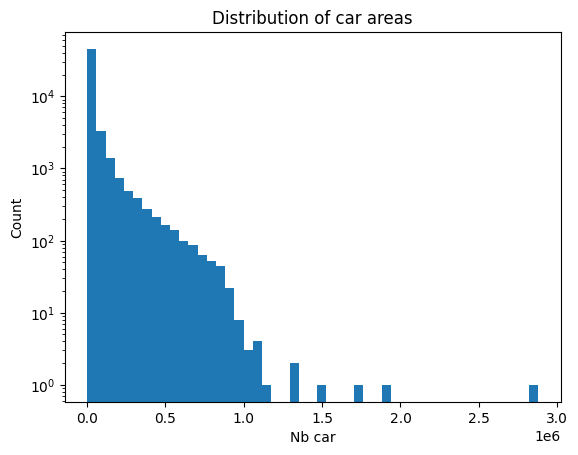

In [ ]:
viz.plot_distribution(get_area_distribution(annot_dict),"Distribution of car areas","Nb car",logy=True)


In [6]:
from processing import  generate_image_segmentation, generate_train_val_test_split
DLAV_DATA = os.path.join(ROOT_PATH, "dlav_data")
NP_IMG_PATH = os.path.join(DLAV_DATA, "image_npz")
NP_SEGM_PATH = os.path.join(DLAV_DATA, "segm_npz")
IMG_FOLDER = os.path.join(ROOT_PATH,"3d-car-understanding-train","train","images")
generate_image_segmentation(IMG_FOLDER, NP_IMG_PATH, NP_SEGM_PATH,sample_demonstration=True)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 161MB/s]


KeyboardInterrupt: ignored

In [39]:
from dataset import get_dataloaders
config_file = os.path.join(ROOT_PATH,"dlav_data","configs","dlav_config.json")
if os.path.exists(config_file):
  with open(config_file, "r") as f:
    config = json.load(f)
else:
  raise ValueError("The given config file doesn't exist")

DATA_PATH = os.path.join(ROOT_PATH, config["dataset"]["data_path"])

train_loader, val_loader, test_loader = get_dataloaders(config, DATA_PATH)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


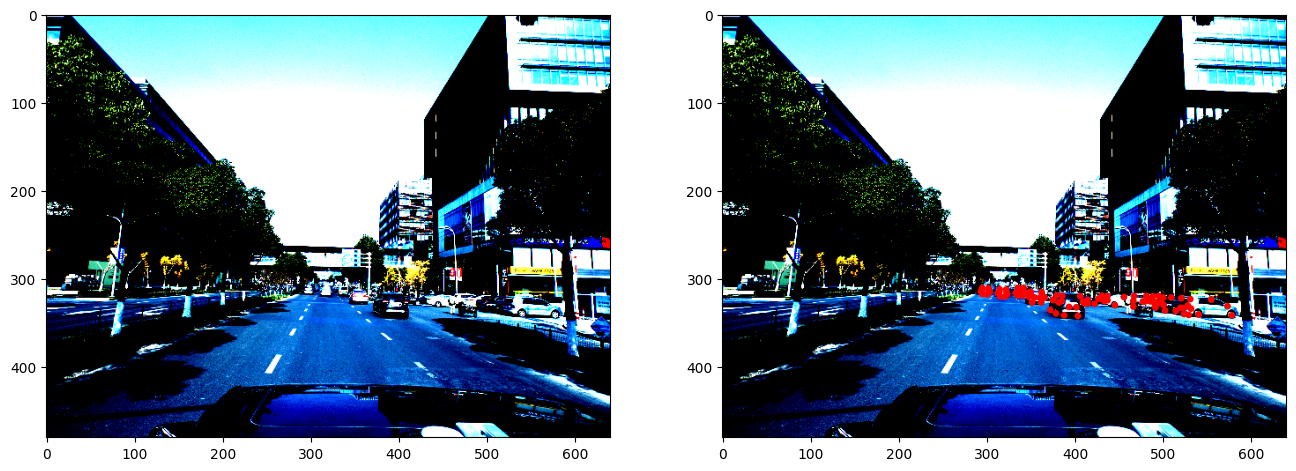

In [42]:
im = val_loader.dataset[0][0].permute(1,2,0).cpu().numpy()
lst = val_loader.dataset[0][2][0]
final_lst = []
for ls in lst: 
  for i in range(24):
    x,y,z = tuple(ls['keypoints'][i*3:(i+1)*3])
    if( z == 2.0):
      final_lst.append([1.0,x,y])
kps = np.array([final_lst])
viz.plot_keypoints(im, kps)